# CKP8087 - Estrutura de Dados
<img  src="https://img.shields.io/badge/UFC_CKP8087-VAUX GOMES-000000?style=for-the-badge&logo=" /> <img src="https://img.shields.io/badge/Jupyter-000000?style=for-the-badge&logo=jupyter&logoColor=white" /> <img src="https://img.shields.io/badge/Python-000000?style=for-the-badge&logo=python&logoColor=white" /> 

#### Bibliotecas principais

In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
nx.__version__ # 3.4.2

'3.4.2'

## Community Detection

In [5]:
class CommunityDetection:
  '''
    Algoritmos utilizados:
    
    - Girvan-Newman 
    - Edge Betweenness Partition 
    - Edge Current Flow Betweenness Partition 
    - K-clique Communities 
    - Greedy Modularity Communities 
    - 🚫 Naïve Greedy Modularity Communities 
    - 🚫 Lukes Partitioning
    - Label Propagation Communities 
    - Fast Label Propagation Communities 
    - Louvain Communities 
    - Asynchronous Fluid Communities 
  '''
  def __init__(self, graph):
    self.graph = graph
  
  # ------------ COMMUNITIES ------------ 
  
  # Girvan-Newman 
  def girvan_newman(self):
    ''' Finds communities in a graph using the Girvan–Newman method '''
    return nx.community.girvan_newman(self.graph)

  # K-clique Communities
  def k_clique(self, k=2):
    ''' Find k-clique communities in graph using the percolation method. '''
    return list(nx.community.k_clique_communities(self.graph, k=k))

  # Greedy Modularity Communities 
  def greedy_modularity_communities(self):
    ''' Find communities in G using greedy modularity maximization '''
    return nx.community.greedy_modularity_communities(self.graph)
  
  # Naïve Greedy Modularity Communities 
  def naive_greedy_modularity_communities(self, resolution=1):
    ''' Find communities in G using greedy modularity maximization. '''
    return nx.community.naive_greedy_modularity_communities(self.graph, resolution=resolution)
  
  # Label Propagation Communities 
  def label_propagation(self):
    ''' Generates community sets determined by label propagation '''
    return list(nx.community.label_propagation_communities(self.graph))
  
  # Fast Label Propagation Communities 
  def fast_label_propagation_communities(self):
    ''' Returns communities in G as detected by fast label propagation. '''
    return list(nx.community.fast_label_propagation_communities(self.graph, seed=42))
  
  # Asynchronous Fluid Communities 
  def async_fluid_communities(self, k=4):
    ''' Returns communities in G as detected by Fluid Communities algorithm. '''
    try:
      return nx.community.asyn_fluidc(self.graph, k=k, seed=42)
    except nx.NetworkXError:
      print('Erro: Verifique se seu grafo é conectado')
      return None
    
  # ------------ PARTITIONS ------------ 
    
  # Edge Betweenness Partition 
  def edge_betweenness_partition(self, number_of_sets=2):
    ''' Partition created by iteratively removing the highest edge betweenness edge. '''
    return nx.community.edge_betweenness_partition(self.graph, number_of_sets=number_of_sets)
    
  # Edge Current Flow Betweenness Partition
  def edge_current_flow_betweenness_partition(self, number_of_sets=2):
    ''' Partition created by removing the highest edge current flow betweenness edge. '''
    return nx.community.edge_current_flow_betweenness_partition(self.graph, number_of_sets=number_of_sets)

  # Louvain Communities 
  def louvain_communities(self):
    ''' Find the best partition of a graph using the Louvain Community Detection Algorithm. '''
    return nx.community.louvain_communities(self.graph)
    
    

## Experimentos

In [7]:
# Experiment
def experiment(detector, save=None):
  computed_scores = {}
  
  # Communities Algoritms
  # Girvan-Newman
  try:
    girvan_newman = detector.girvan_newman()

    part = next(girvan_newman)
    part = list(map(list, part))
    modularity = nx.community.modularity(detector.graph, part)
    coverage, performance = nx.community.partition_quality(detector.graph, part)

    computed_scores['girvan_newman'] = { 
      'modularity': modularity, 'coverage': coverage,  'performance': performance }

    if save is not None:
      with open(f'./saves/{save}_girvan_newman.json', 'w') as file:
        json.dump({"partition": part, "score": modularity}, file, indent=2)
        
  except:
    computed_scores['girvan_newman'] = { 
      'modularity': float('NaN'), 'coverage': float('NaN'), 'performance': float('NaN') } 
    print('Girvan-Newman: Erro, não foi possível calcular')
      
  # K-Cliques
  try:
    k_clique = detector.k_clique(k=2)

    part = list(map(list, k_clique))
    modularity = nx.community.modularity(detector.graph, part)
    coverage, performance = nx.community.partition_quality(detector.graph, part)

    computed_scores['k_clique'] = { 
      'modularity': modularity, 'coverage': coverage,  'performance': performance }

    if save is not None:
      with open(f'./saves/{save}_k_clique.json', 'w') as file:
        json.dump({"partition": part, "score": modularity}, file, indent=2)
  except:
    computed_scores['k_clique'] = { 
      'modularity': float('NaN'), 'coverage': float('NaN'), 'performance': float('NaN') } 
    print('K-Cliques: Erro, não foi possível calcular')
    
  # Greedy Modularity Communities 
  try:
    greedy_modularity_communities = detector.greedy_modularity_communities()
    
    part = list(map(list, greedy_modularity_communities))
    modularity = nx.community.modularity(detector.graph, part)
    coverage, performance = nx.community.partition_quality(detector.graph, part)

    computed_scores['greedy_modularity_communities'] = { 
      'modularity': modularity, 'coverage': coverage,  'performance': performance }

    if save is not None:
      with open(f'./saves/{save}_greedy_modularity_communities.json', 'w') as file:
        json.dump({"partition": part, "score": modularity}, file, indent=2)
  except:
    computed_scores['greedy_modularity_communities'] = { 
      'modularity': float('NaN'), 'coverage': float('NaN'), 'performance': float('NaN') } 
    print('Greedy Modularity Communities: Erro, não foi possível calcular')
    
  # Label Propagation Communities  
  try:
    label_propagation = detector.label_propagation()
    
    part = list(map(list, label_propagation))
    modularity = nx.community.modularity(detector.graph, part)
    coverage, performance = nx.community.partition_quality(detector.graph, part)

    computed_scores['label_propagation'] = { 
      'modularity': modularity, 'coverage': coverage,  'performance': performance }

    if save is not None:
      with open(f'./saves/{save}_label_propagation.json', 'w') as file:
        json.dump({"partition": part, "score": modularity}, file, indent=2)
  except:
    computed_scores['label_propagation'] = { 
      'modularity': float('NaN'), 'coverage': float('NaN'), 'performance': float('NaN') } 
    print('Label Propagation Communities: Erro, não foi possível calcular')
    
  # Fast Label Propagation Communities 
  try:
    fast_label_propagation_communities = detector.fast_label_propagation_communities()
    
    part = list(map(list, fast_label_propagation_communities))
    modularity = nx.community.modularity(detector.graph, part)
    coverage, performance = nx.community.partition_quality(detector.graph, part)

    computed_scores['fast_label_propagation_communities'] = { 
      'modularity': modularity, 'coverage': coverage,  'performance': performance }

    if save is not None:
      with open(f'./saves/{save}_fast_label_propagation_communities.json', 'w') as file:
        json.dump({"partition": part, "score": modularity}, file, indent=2)
  except:
    computed_scores['fast_label_propagation_communities'] = { 
      'modularity': float('NaN'), 'coverage': float('NaN'), 'performance': float('NaN') } 
    print('Fast Label Propagation Communities: Erro, não foi possível calcular')
    
  
  # Partitions Algoritms    
  # Edge Betweenness Partition
  try:
    edge_betweenness_partition = detector.edge_betweenness_partition()
    
    part = list(map(list, edge_betweenness_partition))
    modularity = nx.community.modularity(detector.graph, part)
    coverage, performance = nx.community.partition_quality(detector.graph, part)

    computed_scores['edge_betweenness_partition'] = { 
      'modularity': modularity, 'coverage': coverage,  'performance': performance }

    if save is not None:
      with open(f'./saves/{save}_edge_betweenness_partition.json', 'w') as file:
        json.dump({"partition": part, "score": modularity}, file, indent=2)
  except:
    computed_scores['edge_betweenness_partition'] = { 
      'modularity': float('NaN'), 'coverage': float('NaN'), 'performance': float('NaN') } 
    print('Edge Betweenness Partition: Erro, não foi possível calcular')
    
  # Edge Current Flow Betweenness Partition
  try:
    edge_current_flow_betweenness_partition = detector.edge_current_flow_betweenness_partition()
    
    part = list(map(list, edge_current_flow_betweenness_partition))
    modularity = nx.community.modularity(detector.graph, part)
    coverage, performance = nx.community.partition_quality(detector.graph, part)

    computed_scores['edge_current_flow_betweenness_partition'] = { 
      'modularity': modularity, 'coverage': coverage,  'performance': performance }

    if save is not None:
      with open(f'./saves/{save}_edge_current_flow_betweenness_partition.json', 'w') as file:
        json.dump({"partition": part, "score": modularity}, file, indent=2)
  except:
    computed_scores['edge_current_flow_betweenness_partition'] = { 
      'modularity': float('NaN'), 'coverage': float('NaN'), 'performance': float('NaN') } 
    print('Edge Current Flow Betweenness Partition: Erro, não foi possível calcular')
    
  # Louvain Communities 
  try:
    louvain_communities = detector.louvain_communities()
    
    part = list(map(list, louvain_communities))
    modularity = nx.community.modularity(detector.graph, part)
    coverage, performance = nx.community.partition_quality(detector.graph, part)

    computed_scores['louvain_communities'] = { 
      'modularity': modularity, 'coverage': coverage,  'performance': performance }

    if save is not None:
      with open(f'./saves/{save}_louvain_communities.json', 'w') as file:
        json.dump({"partition": part, "score": modularity}, file, indent=2)
  except:
    computed_scores['louvain_communities'] = { 
      'modularity': float('NaN'), 'coverage': float('NaN'), 'performance': float('NaN') } 
    print('Louvain Communities: Erro, não foi possível calcular')
    
  # Final save
  try:
    if save is not None:
      with open(f'./saves/{save}_scores.json', 'w') as file:
        json.dump(computed_scores, file, indent=2)
  except:
    print('Final Save: Erro, não foi possível calcular')
    
  return computed_scores

#### Loading

In [6]:
# Carregando os diferentes gráficos
geral =          CommunityDetection(nx.read_graphml('./files/graphs/geral.graphml'))
viral =          CommunityDetection(nx.read_graphml('./files/graphs/viral.graphml'))
misinformation = CommunityDetection(nx.read_graphml('./files/graphs/misinformation.graphml'))

#### Runs

In [198]:
%time misinformation_scores = experiment(misinformation, save='misinformation')

CPU times: user 2min 5s, sys: 3.05 s, total: 2min 8s
Wall time: 1min 57s


In [8]:
%time viral_scores = experiment(viral, save='viral')

CPU times: user 2h 32min 16s, sys: 1min 29s, total: 2h 33min 45s
Wall time: 2h 14min 35s


In [ ]:
%time geral_scores = experiment(geral, save='geral')

## Apresentação dos dados

In [256]:
# Loading
with open('./saves/misinformation_scores.json', 'r') as file: misinformationdf = pd.DataFrame.from_dict(json.load(file), orient='index')
with open('./saves/viral_scores.json', 'r') as file: viraldf = pd.DataFrame.from_dict(json.load(file), orient='index')
# with open('./saves/geral_scores.json', 'r') as file: geraldf = pd.DataFrame.from_dict(json.load(file), orient='index')

# Merge
df = pd.merge(viraldf, misinformationdf, left_index=True, right_index=True, how='inner', suffixes=('_v', '_m'))

# Split
modularity = df[['modularity_v', 'modularity_m']].values
coverage = df[['coverage_v', 'coverage_m']].values
performance = df[['performance_v', 'performance_m']].values

In [262]:
algs = [
  'Girvan\nNewman', 'KClique', 'Greedy\nModularity', 
  'Label\nPropagation', 'Fast Label\nPropagation', 
  'Edge\nBetweenness','Edge\nCurrent Flow', 'Louvain\nCommunities'
]

In [269]:
# PLOT
def compare(values, title, labels):
  width = 0.75
  x = np.arange(values.shape[0]) * 2  
  
  fig, ax = plt.subplots(layout='constrained', figsize=(12, 5))

  for i in range(values.shape[1]):
    offset = width * i
    rects = ax.bar(x + offset, values[:, i].round(2), width, label=labels[i])
    ax.bar_label(rects, padding=3)

  ax.set_xticks(x + width/2, algs)
  ax.set_xticklabels(algs)#, rotation=90)
  ax.set_yticks(np.linspace(0, 1, 11).round(2))
  ax.set_title(title)

  ax.legend(bbox_to_anchor=(1, 1), loc="upper left")

### Modularity


Definição
<div class="alert alert-block alert-success">
  A modularidade <u>quantifica a força da divisão do grafo em comunidades</u>. Ela mede a densidade de arestas dentro das comunidades em comparação com a densidade de arestas entre as comunidades.
</div>

Interpretação
<div class="alert alert-block alert-info">
  <li>Valores próximos de 1 → Forte estrutura de comunidade, com muitas arestas dentro das comunidades e poucas entre elas.</li>
  <li>Valores próximos de 0 → A estrutura de comunidade não é muito forte, ou que a divisão é aleatória.</li>
  <li>Valores negativos → A partição é pior do que uma partição aleatória.</li>
</div>

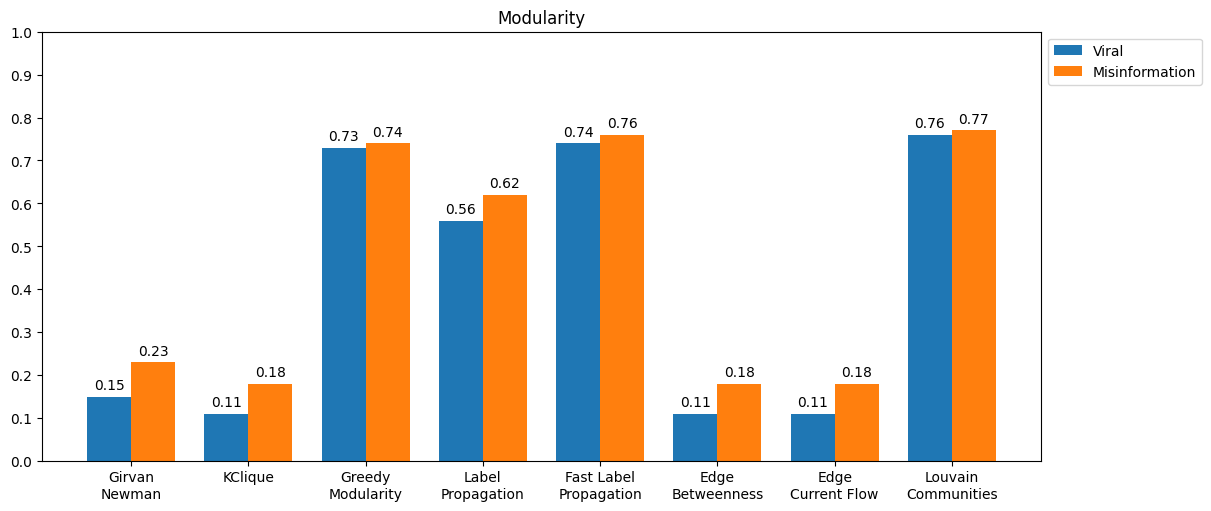

In [270]:
compare(modularity, "Modularity", ['Viral', 'Misinformation'])

### Coverage

Definição
<div class="alert alert-block alert-success">
  Indica o quão bem a(s) comunidade(s) "cobre(m)" as arestas do grafo.
</div>

Interpretação
<div class="alert alert-block alert-info">
  <li>Valores próximos de 1 → Todas as arestas do grafo estão dentro das comunidades detectadas.</li>
  <li>Valores próximos de 0 → Indica que algumas arestas conectam nós de comunidades diferentes.</li>
</div>

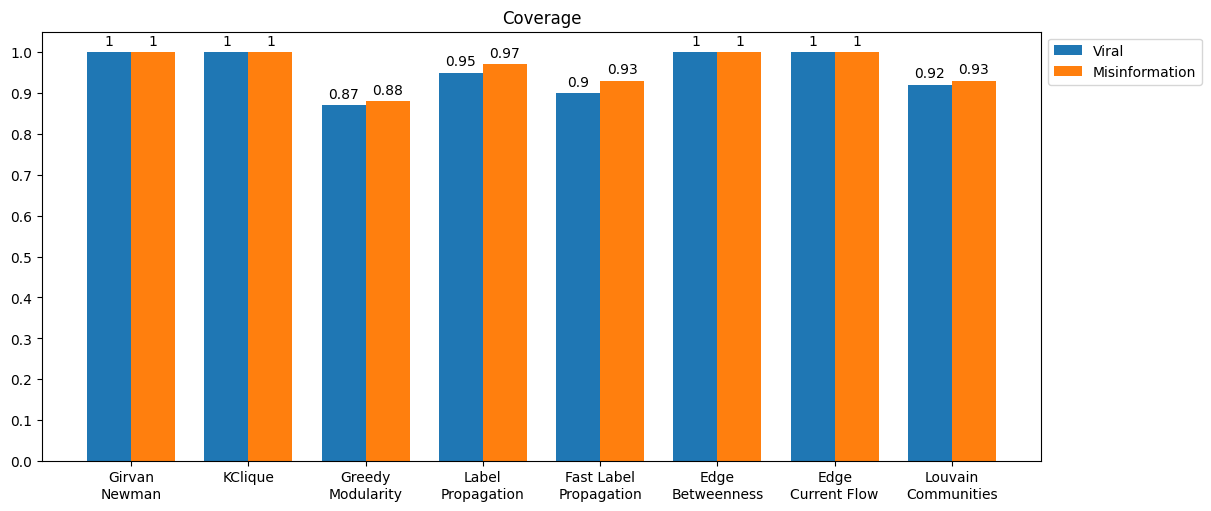

In [271]:
compare(coverage, "Coverage", ['Viral', 'Misinformation'])

### Performance

Definição
<div class="alert alert-block alert-success">
  Mede a fração de pares de nós que estão na mesma comunidade na partição encontrada e na partição de referência.
</div>

Interpretação
<div class="alert alert-block alert-info">
  <li>Valor de 1 → Indica uma correspondência perfeita entre a partição encontrada e a de referência..</li>
  <li>Valores menores que 1 → Indica diferenças entre as partições.</li>
</div>

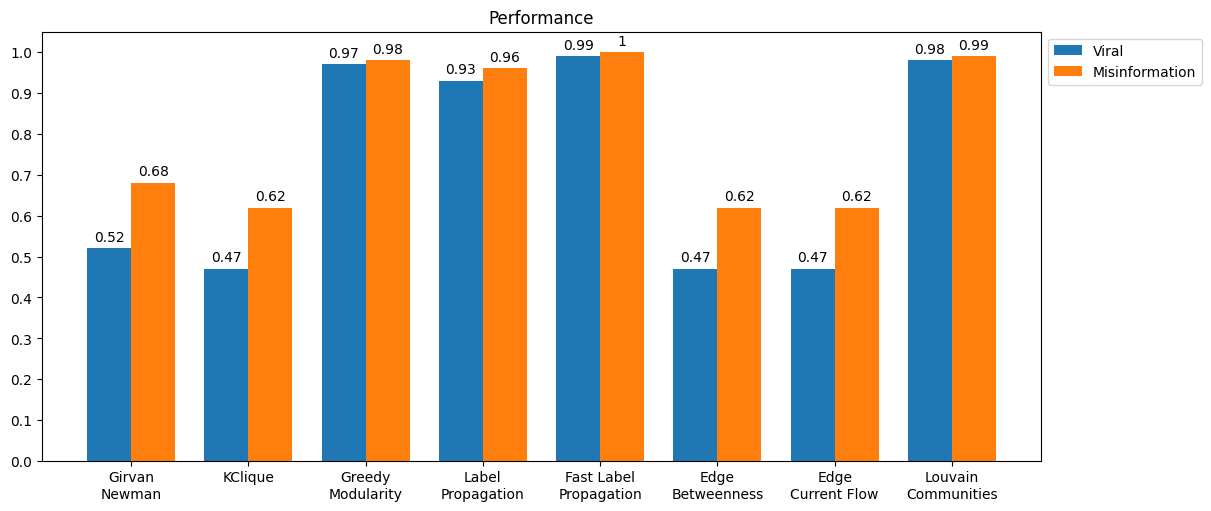

In [272]:
compare(performance, "Performance", ['Viral', 'Misinformation'])